In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

In [4]:
df = pd.read_csv("Social_Network_Ads.csv")

In [5]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
df["Gender"] = df["Gender"].map({"Male":1,"Female":0})

In [7]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [8]:
df.drop("User ID",axis=1,inplace=True)

In [9]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [10]:
df.shape

(400, 4)

# Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop("Purchased" , axis =1 )
y = df["Purchased"]

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0)

In [13]:
X_train.shape , X_test.shape

((320, 3), (80, 3))

# Applying StandarScaler

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Fit the scaler to the train set , it will learn the paramters 
scaler.fit(X_train)


#transform train and test sets

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
X_train_scaled = pd.DataFrame(data = X_train_scaled , columns = X_train.columns)
X_test_scaled = pd.DataFrame(data = X_test_scaled , columns = X_test.columns)

In [16]:
X_test_scaled

,Gender,Age,EstimatedSalary
0,1.025320,-0.798951,0.494608
1,-0.975305,-0.021265,-0.577359
2,1.025320,-0.312897,0.146943
3,-0.975305,-0.798951,0.262831
4,-0.975305,-0.312897,-0.577359
...,...,...,...
75,1.025320,-1.965480,0.349747
76,-0.975305,0.367578,0.262831
77,-0.975305,0.173157,-0.287638
78,-0.975305,1.436896,-1.040912


In [17]:
np.round(X_train.describe(),2)

,Gender,Age,EstimatedSalary
count,320.00,320.00,320.00
mean,0.49,38.22,69928.12
std,0.50,10.30,34570.06
min,0.00,18.00,15000.00
25%,0.00,30.00,43000.00
50%,0.00,38.00,69500.00
75%,1.00,46.00,88000.00
max,1.00,60.00,150000.00


In [18]:
np.round(X_train_scaled.describe(),2)

,Gender,Age,EstimatedSalary
count,320.00,320.00,320.00
mean,-0.00,0.00,0.00
std,1.00,1.00,1.00
min,-0.98,-1.97,-1.59
25%,-0.98,-0.80,-0.78
50%,-0.98,-0.02,-0.01
75%,1.03,0.76,0.52
max,1.03,2.12,2.32


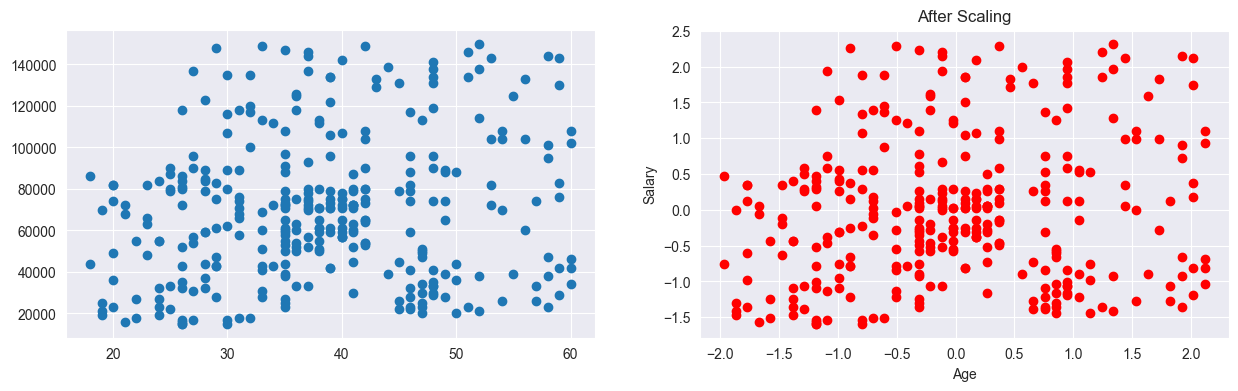

In [19]:
fig , (x1 , x2 ) = plt.subplots(1,2,figsize=(15,4))
x1.scatter(X_train["Age"],X_train["EstimatedSalary"])
plt.title("Before Scaling")
plt.xlabel("Age")
plt.ylabel("Salary")

x2.scatter(X_train_scaled["Age"],X_train_scaled["EstimatedSalary"] , color = "red")
plt.title("After Scaling")
plt.xlabel("Age")
plt.ylabel("Salary")

plt.show()